In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('laptop_data.xlsx')

In [3]:
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum() #duplicate rows

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [10]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000  
3            AMD Radeon Pro 455  macOS   1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080

In [11]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [13]:
import seaborn as sns
import matplotlib as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

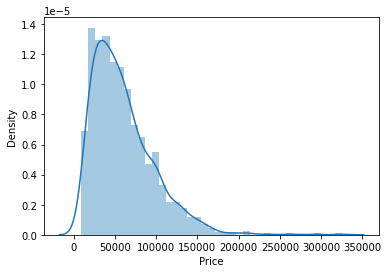

In [14]:
sns.distplot(df['Price'])

In [15]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<AxesSubplot:>

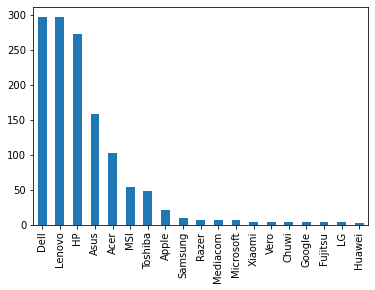

In [16]:
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Company', ylabel='Price'>

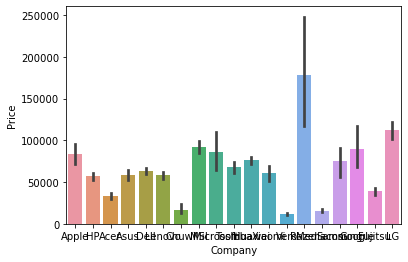

In [17]:
sns.barplot(x=df['Company'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

<AxesSubplot:>

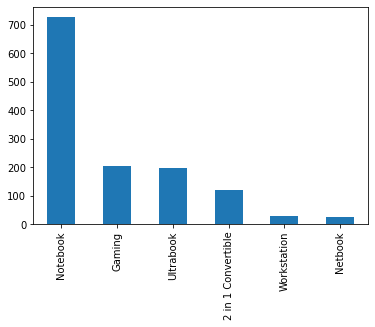

In [18]:
df['TypeName'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

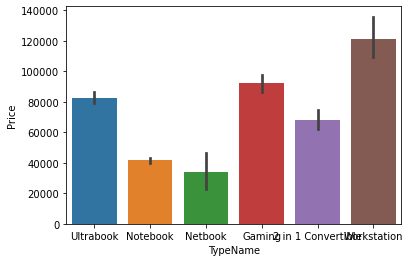

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

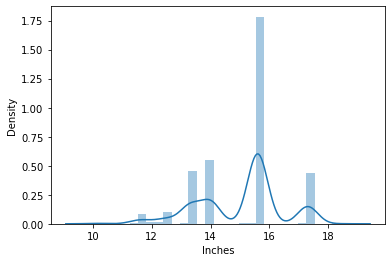

In [20]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

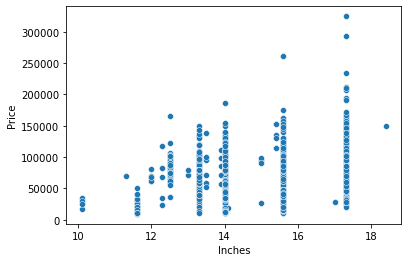

In [21]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
#extract information form ScreenResolution 
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

Company            TypeName  Inches                 ScreenResolution  \
365      HP            Notebook    15.6                         1366x768   
857      HP  2 in 1 Convertible    13.3  Full HD / Touchscreen 1920x1080   
999      HP           Ultrabook    14.0                Full HD 1920x1080   
677      HP  2 in 1 Convertible    11.6             Touchscreen 1366x768   
247    Asus              Gaming    17.3                Full HD 1920x1080   

                                      Cpu  Ram              Memory  \
365  Intel Pentium Quad Core N3710 1.6GHz    8             2TB HDD   
857            Intel Core i7 7600U 2.8GHz    8           256GB SSD   
999            Intel Core i7 7500U 2.7GHz    8           512GB SSD   
677  Intel Celeron Dual Core N3350 1.1GHz    8  64GB Flash Storage   
247           Intel Core i7 7820HK 2.9GHz   16           256GB SSD   

                         Gpu       OpSys  Weight      Price  Touchscreen  
365    Intel HD Graphics 405  Windows 10    2.04   20725.92            0  
857    Intel HD Graphics 620  Windows 10    1.28  136343.52            1  
999    Intel HD Graphics 620  Windows 10    1.48  111301.92            0  
677    Intel HD Graphics 500   Chrome OS    1.40   26373.60            1  
247  Nvidia GeForce GTX 1080  Windows 10    3.60  159786.72            0

In [24]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

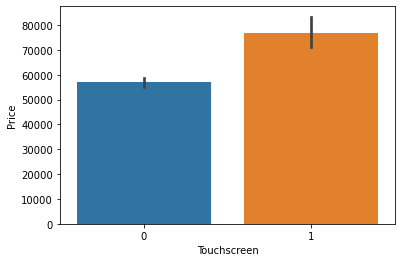

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [26]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  IPS  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1

<AxesSubplot:xlabel='IPS', ylabel='Price'>

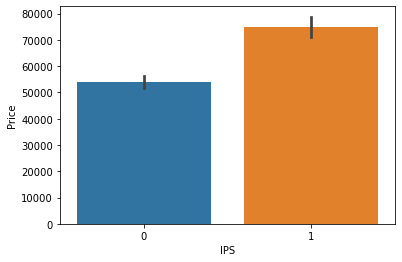

In [27]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [28]:
type(df['ScreenResolution'].str.split('x'))

pandas.core.series.Series

In [29]:
type(df['ScreenResolution'].str.split('x')[0])

list

In [30]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [31]:
type(df['ScreenResolution'].str.split('x',expand=True))

pandas.core.frame.DataFrame

In [32]:
df['ScreenResolution'].str.split('x',expand=True)

0     1
0             IPS Panel Retina Display 2560  1600
1                                      1440   900
2                              Full HD 1920  1080
3             IPS Panel Retina Display 2880  1800
4             IPS Panel Retina Display 2560  1600
...                                     ...   ...
1298   IPS Panel Full HD / Touchscreen 1920  1080
1299  IPS Panel Quad HD+ / Touchscreen 3200  1800
1300                                   1366   768
1301                                   1366   768
1302                                   1366   768

[1303 rows x 2 columns]

In [33]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True) #ig same as above why n=1????

In [34]:
new[0]=new[0].str.split(' ').str.get(-1)

In [35]:
df['X_res']=new[0]

In [36]:
df['Y_res']=new[1]

In [37]:
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')

In [38]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  IPS  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

   X_res  Y_res  
0   2560   1600  
1   1440    900  
2   1920   1080  
3   2880   1800  
4   2560   1600

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [40]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [41]:
# make new column pixel per inch (ppi)
df['ppi'] = ( ((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [42]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [43]:
df.drop(columns=['ScreenResolution','X_res','Y_res'],inplace=True)

In [44]:
df.head()

Company   TypeName  Inches                         Cpu  Ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  IPS         ppi  
0   71378.6832            0    1  226.983005  
1   47895.5232            0    0  127.677940  
2   30636.0000            0    0  141.211998  
3  135195.3360            0    1  220.534624  
4   96095.8080            0    1  226.983005

In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
df.head()

Company   TypeName  Inches                         Cpu  Ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  IPS         ppi       Cpu_Name  
0   71378.6832            0    1  226.983005  Intel Core i5  
1   47895.5232            0    0  127.677940  Intel Core i5  
2   30636.0000            0    0  141.211998  Intel Core i5  
3  135195.3360            0    1  220.534624  Intel Core i7  
4   96095.8080            0    1  226.983005  Intel Core i5

In [48]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [49]:
df['Cpu_brand'] = df['Cpu_Name'].apply(fetch_processor)
df.head()

Company   TypeName  Inches                         Cpu  Ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  IPS         ppi       Cpu_Name      Cpu_brand  
0   71378.6832            0    1  226.983005  Intel Core i5  Intel Core i5  
1   47895.5232            0    0  127.677940  Intel Core i5  Intel Core i5  
2   30636.0000            0    0  141.211998  Intel Core i5  Intel Core i5  
3  135195.3360            0    1  220.534624  Intel Core i7  Intel Core i7  
4   96095.8080            0    1  226.983005  Intel Core i5  Intel Core i5

<AxesSubplot:>

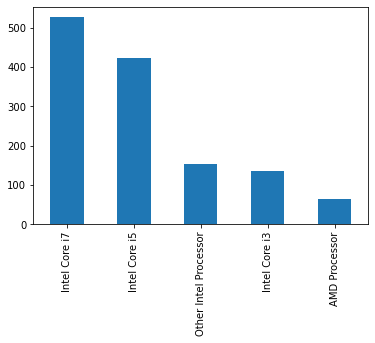

In [50]:
df['Cpu_brand'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cpu_brand', ylabel='Price'>

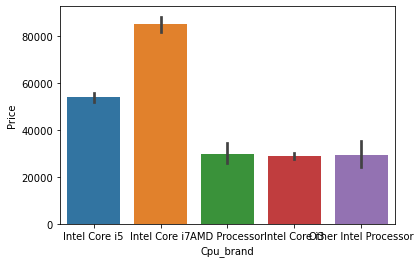

In [51]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

In [52]:
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)
df.head()

Company   TypeName  Inches  Ram               Memory  \
0   Apple  Ultrabook    13.3    8            128GB SSD   
1   Apple  Ultrabook    13.3    8  128GB Flash Storage   
2      HP   Notebook    15.6    8            256GB SSD   
3   Apple  Ultrabook    15.4   16            512GB SSD   
4   Apple  Ultrabook    13.3    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  IPS  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          ppi      Cpu_brand  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

<AxesSubplot:>

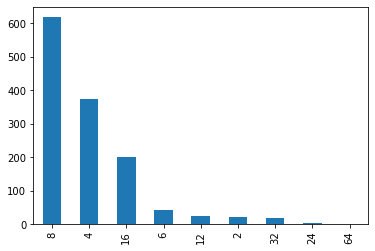

In [53]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

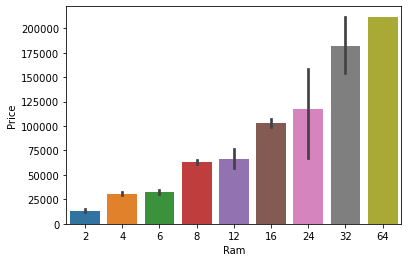

In [54]:
sns.barplot(x=df['Ram'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

In [55]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\vatsal shingala\AppData\Local\Temp\ipykernel_12636\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\vatsal shingala\AppData\Local\Temp\ipykernel_12636\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [57]:
df.sample(5)

Company            TypeName  Inches  Ram               Memory  \
995     Asus            Notebook    13.3    8              256 SSD   
1038    Dell            Notebook    15.6    8              256 SSD   
1298  Lenovo  2 in 1 Convertible    14.0    4              128 SSD   
961   Lenovo           Ultrabook    12.5    8              256 SSD   
435     Asus              Gaming    17.3    8  256 SSD +  1000 HDD   

                        Gpu       OpSys  Weight      Price  Touchscreen  IPS  \
995   Intel HD Graphics 620  Windows 10    1.40  61272.000            0    0   
1038  Intel HD Graphics 520   Windows 7    2.09  56633.976            0    0   
1298  Intel HD Graphics 520  Windows 10    1.80  33992.640            1    1   
961   Intel HD Graphics 620  Windows 10    1.36  93772.800            0    1   
435       AMD Radeon RX 580  Windows 10    3.20  90309.600            0    0   

             ppi      Cpu_brand   HDD  SSD  Hybrid  Flash_Storage  
995   276.053530  Intel Core i5     0  256       0              0  
1038  141.211998  Intel Core i5     0  256       0              0  
1298  157.350512  Intel Core i7     0  128       0              0  
961   176.232574  Intel Core i5     0  256       0              0  
435   127.335675  AMD Processor  1000  256       0              0

In [58]:
df.drop(columns=['Memory'],inplace=True)
df.head()

Company   TypeName  Inches  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  IPS         ppi      Cpu_brand  HDD  SSD  \
0    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128   
1    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0   
2    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256   
3    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512   
4    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256   

   Hybrid  Flash_Storage  
0       0              0  
1       0            128  
2       0              0  
3       0              0  
4       0              0

In [59]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [60]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head() #by experiment we find that taking HDD give good result so not remove it

Company   TypeName  Inches  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  IPS         ppi      Cpu_brand  HDD  SSD  
0    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256

In [61]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [62]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

Company   TypeName  Inches  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  IPS         ppi      Cpu_brand  HDD  SSD  \
0    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128   
1    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0   
2    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256   
3    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512   
4    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256   

  Gpu brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [63]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [64]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

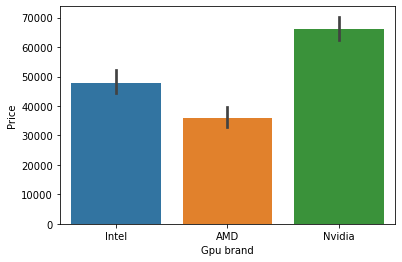

In [65]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
# plt.xticks(rotation='vertical')
# plt.show()

In [66]:
df.drop(columns=['Gpu'],inplace=True)

In [67]:
df.head()

Company   TypeName  Inches  Ram  OpSys  Weight        Price  Touchscreen  \
0   Apple  Ultrabook    13.3    8  macOS    1.37   71378.6832            0   
1   Apple  Ultrabook    13.3    8  macOS    1.34   47895.5232            0   
2      HP   Notebook    15.6    8  No OS    1.86   30636.0000            0   
3   Apple  Ultrabook    15.4   16  macOS    1.83  135195.3360            0   
4   Apple  Ultrabook    13.3    8  macOS    1.37   96095.8080            0   

   IPS         ppi      Cpu_brand  HDD  SSD Gpu brand  
0    1  226.983005  Intel Core i5    0  128     Intel  
1    0  127.677940  Intel Core i5    0    0     Intel  
2    0  141.211998  Intel Core i5    0  256     Intel  
3    1  220.534624  Intel Core i7    0  512       AMD  
4    1  226.983005  Intel Core i5    0  256     Intel

In [68]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

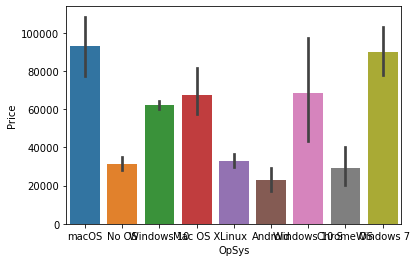

In [69]:
sns.barplot(x=df['OpSys'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

In [70]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [71]:
df['os'] = df['OpSys'].apply(cat_os)

In [72]:
df.head()

Company   TypeName  Inches  Ram  OpSys  Weight        Price  Touchscreen  \
0   Apple  Ultrabook    13.3    8  macOS    1.37   71378.6832            0   
1   Apple  Ultrabook    13.3    8  macOS    1.34   47895.5232            0   
2      HP   Notebook    15.6    8  No OS    1.86   30636.0000            0   
3   Apple  Ultrabook    15.4   16  macOS    1.83  135195.3360            0   
4   Apple  Ultrabook    13.3    8  macOS    1.37   96095.8080            0   

   IPS         ppi      Cpu_brand  HDD  SSD Gpu brand                  os  
0    1  226.983005  Intel Core i5    0  128     Intel                 Mac  
1    0  127.677940  Intel Core i5    0    0     Intel                 Mac  
2    0  141.211998  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3    1  220.534624  Intel Core i7    0  512       AMD                 Mac  
4    1  226.983005  Intel Core i5    0  256     Intel                 Mac

In [73]:
df.drop(columns=['OpSys','Inches'],inplace=True)

<AxesSubplot:xlabel='os', ylabel='Price'>

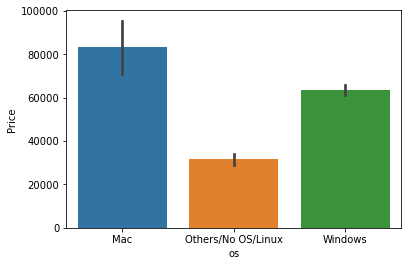

In [74]:
sns.barplot(x=df['os'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

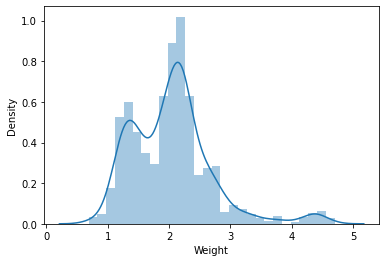

In [75]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

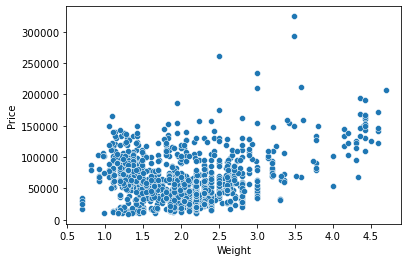

In [76]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [77]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

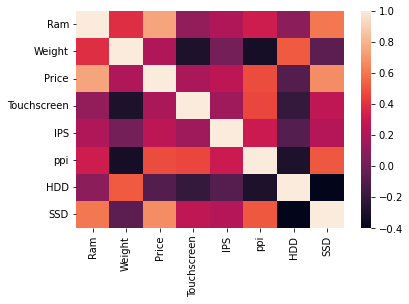

In [78]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

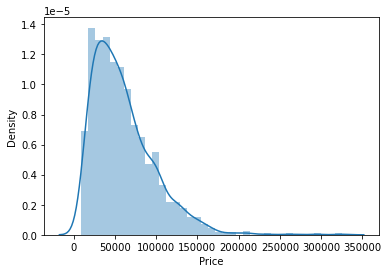

In [79]:
sns.distplot(df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

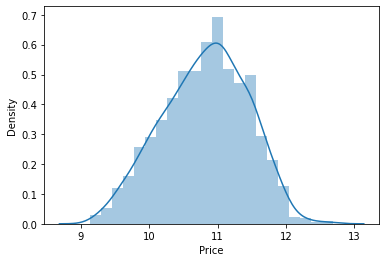

In [80]:
sns.distplot(np.log(df['Price']))

In [81]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])
x

Company            TypeName  Ram  Weight  Touchscreen  IPS         ppi  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu_brand   HDD  SSD Gpu brand                  os  
0             Intel Core i5     0  128     Intel                 Mac  
1             Intel Core i5     0    0     Intel                 Mac  
2             Intel Core i5     0  256     Intel  Others/No OS/Linux  
3             Intel Core i7     0  512       AMD                 Mac  
4             Intel Core i5     0  256     Intel                 Mac  
...                     ...   ...  ...       ...                 ...  
1298          Intel Core i7     0  128     Intel             Windows  
1299          Intel Core i7     0  512     Intel             Windows  
1300  Other Intel Processor     0    0     Intel             Windows  
1301          Intel Core i7  1000    0       AMD             Windows  
1302  Other Intel Processor   500    0     Intel             Windows  

[1302 rows x 12 columns]

In [82]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)
x_train

Company            TypeName  Ram  Weight  Touchscreen  IPS         ppi  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu_brand   HDD  SSD Gpu brand                  os  
183           Intel Core i5     0  128     Intel             Windows  
1141          Intel Core i7  1000  128    Nvidia             Windows  
1049  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0     Intel             Windows  
878           Intel Core i5  1000  128    Nvidia             Windows  
...                     ...   ...  ...       ...                 ...  
466           Intel Core i3   500    0    Nvidia             Windows  
299           Intel Core i7     0  512    Nvidia             Windows  
493           AMD Processor  1000    0       AMD             Windows  
527           Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
1193  Other Intel Processor     0    0     Intel                 Mac  

[1106 rows x 12 columns]

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [85]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418701
MAE 0.21017827976428788


# Ridge Regression

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


# Lasso Regression

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472601


# KNN

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)x

SyntaxError: invalid syntax (1630764940.py, line 17)

# Decision Tree

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8460433204530382
MAE 0.1790933091031378


# SVM

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083736927567782
MAE 0.20238417300719586


# Random Forest

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8857051529041271
MAE 0.15923819455512872


# ExtraTrees

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8774570955425957
MAE 0.16019883556713832


# AdaBoost

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8068373059269184
MAE 0.22151965482930816


# Gradient Boost

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8824024879077293
MAE 0.1594174963075682


# XgBoost

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600985


# Voting Regressor

In [102]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8901363176287785
MAE 0.1588265583372888


# Stacking

In [103]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8831285773139204
MAE 0.1660831016201229


# Exporting the Model

In [104]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
df

Company            TypeName  Ram  Weight        Price  Touchscreen  IPS  \
0      Apple           Ultrabook    8    1.37   71378.6832            0    1   
1      Apple           Ultrabook    8    1.34   47895.5232            0    0   
2         HP            Notebook    8    1.86   30636.0000            0    0   
3      Apple           Ultrabook   16    1.83  135195.3360            0    1   
4      Apple           Ultrabook    8    1.37   96095.8080            0    1   
...      ...                 ...  ...     ...          ...          ...  ...   
1298  Lenovo  2 in 1 Convertible    4    1.80   33992.6400            1    1   
1299  Lenovo  2 in 1 Convertible   16    1.30   79866.7200            1    1   
1300  Lenovo            Notebook    2    1.50   12201.1200            0    0   
1301      HP            Notebook    6    2.19   40705.9200            0    0   
1302    Asus            Notebook    4    2.20   19660.3200            0    0   

             ppi              Cpu_brand   HDD  SSD Gpu brand  \
0     226.983005          Intel Core i5     0  128     Intel   
1     127.677940          Intel Core i5     0    0     Intel   
2     141.211998          Intel Core i5     0  256     Intel   
3     220.534624          Intel Core i7     0  512       AMD   
4     226.983005          Intel Core i5     0  256     Intel   
...          ...                    ...   ...  ...       ...   
1298  157.350512          Intel Core i7     0  128     Intel   
1299  276.053530          Intel Core i7     0  512     Intel   
1300  111.935204  Other Intel Processor     0    0     Intel   
1301  100.454670          Intel Core i7  1000    0       AMD   
1302  100.454670  Other Intel Processor   500    0     Intel   

                      os  
0                    Mac  
1                    Mac  
2     Others/No OS/Linux  
3                    Mac  
4                    Mac  
...                  ...  
1298             Windows  
1299             Windows  
1300             Windows  
1301             Windows  
1302             Windows  

[1302 rows x 13 columns]

In [106]:
x_train

Company            TypeName  Ram  Weight  Touchscreen  IPS         ppi  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu_brand   HDD  SSD Gpu brand                  os  
183           Intel Core i5     0  128     Intel             Windows  
1141          Intel Core i7  1000  128    Nvidia             Windows  
1049  Other Intel Processor     0    0     Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0     Intel             Windows  
878           Intel Core i5  1000  128    Nvidia             Windows  
...                     ...   ...  ...       ...                 ...  
466           Intel Core i3   500    0    Nvidia             Windows  
299           Intel Core i7     0  512    Nvidia             Windows  
493           AMD Processor  1000    0       AMD             Windows  
527           Intel Core i3  2000    0    Nvidia  Others/No OS/Linux  
1193  Other Intel Processor     0    0     Intel                 Mac  

[1106 rows x 12 columns]